In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
dataset = pd.read_csv('employees.csv')

## load the data

In [4]:
dataset.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,title,dept_no
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,Senior Engineer,d005
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828,Staff,d007
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,40006,Senior Engineer,d004
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,Engineer,d004
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,78228,Senior Staff,d003


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101796 entries, 0 to 101795
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      101796 non-null  int64 
 1   birth_date  101796 non-null  object
 2   first_name  101796 non-null  object
 3   last_name   101796 non-null  object
 4   gender      101796 non-null  object
 5   hire_date   101796 non-null  object
 6   salary      101796 non-null  int64 
 7   title       101796 non-null  object
 8   dept_no     101796 non-null  object
dtypes: int64(2), object(7)
memory usage: 7.0+ MB


<AxesSubplot:>

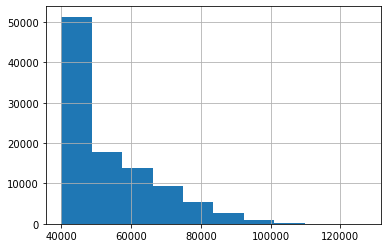

In [65]:
dataset['salary'].hist()

In [7]:
dataset.describe()

,emp_no,salary
count,101796.000000,101796.000000
mean,62464.908700,52930.057389
std,34039.578508,14330.979073
min,10001.000000,40000.000000
25%,35449.750000,40000.000000
50%,60898.500000,48543.000000
75%,86347.250000,61710.500000
max,201771.000000,127238.000000


## converting to date time object

In [8]:
#converting objects to date 
dataset[['birth_date','hire_date']] = dataset[['birth_date','hire_date']].apply(pd.to_datetime)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101796 entries, 0 to 101795
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   emp_no      101796 non-null  int64         
 1   birth_date  101796 non-null  datetime64[ns]
 2   first_name  101796 non-null  object        
 3   last_name   101796 non-null  object        
 4   gender      101796 non-null  object        
 5   hire_date   101796 non-null  datetime64[ns]
 6   salary      101796 non-null  int64         
 7   title       101796 non-null  object        
 8   dept_no     101796 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 7.0+ MB


## Inserting a new colomn for the age when hired

In [10]:
# will make a new coloumn the age when hired
dataset['age'] = round((dataset['hire_date'] - dataset['birth_date'])/np.timedelta64(1,'Y'),0)

In [11]:
dataset

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,title,dept_no,age
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,Senior Engineer,d005,33.0
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828,Staff,d007,21.0
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,40006,Senior Engineer,d004,27.0
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,Engineer,d004,33.0
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,78228,Senior Staff,d003,35.0
...,...,...,...,...,...,...,...,...,...,...
101791,201767,1961-12-31,Divier,Basart,F,1989-03-07,47097,Staff,d001,27.0
101792,201768,1963-02-20,Aksel,Muhling,M,1997-10-11,40000,Assistant Engineer,d004,35.0
101793,201769,1961-11-06,Jayesh,Merel,M,1992-09-26,48427,Technique Leader,d004,31.0
101794,201770,1953-01-22,Weijing,Rodham,F,1992-12-06,66998,Senior Staff,d007,40.0


## Data visualization and pre-processing

<AxesSubplot:xlabel='count', ylabel='gender'>

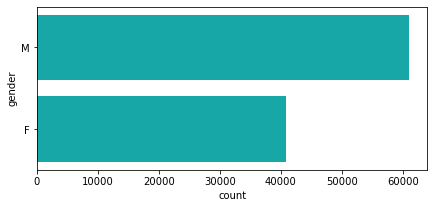

In [12]:
# distrbution of the gender 
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="gender", data=dataset, color="c")

C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

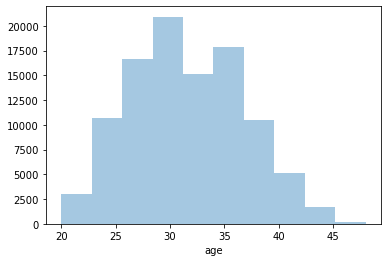

In [13]:
#lets see the age distrbution 
sns.distplot(dataset['age'], bins=10, kde=False)

In [14]:
dataset.describe()

,emp_no,salary,age
count,101796.000000,101796.000000,101796.000000
mean,62464.908700,52930.057389,31.511572
std,34039.578508,14330.979073,5.143374
min,10001.000000,40000.000000,20.000000
25%,35449.750000,40000.000000,28.000000
50%,60898.500000,48543.000000,31.000000
75%,86347.250000,61710.500000,35.000000
max,201771.000000,127238.000000,48.000000


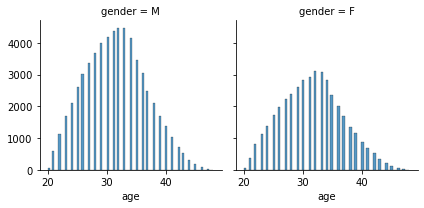

In [15]:
# distrbution of ages vs the gender 
g = sns.FacetGrid(dataset, col="gender")
g.map(sns.histplot, "age")
sns.color_palette("YlOrBr", as_cmap=True)

C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dept_no', ylabel='count'>

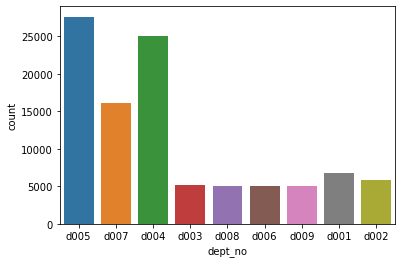

In [16]:
#counting the departmets 
sns.countplot(dataset['dept_no'])

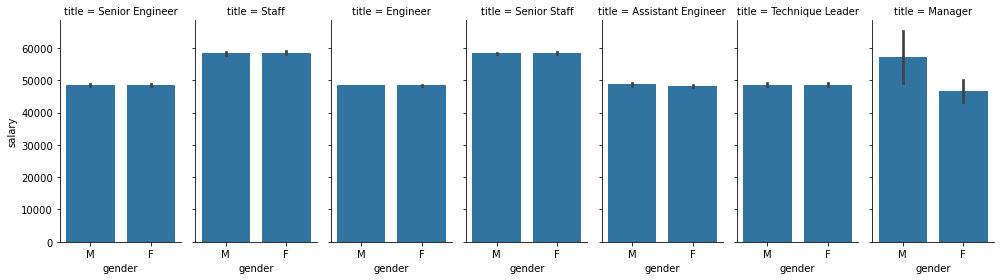

In [17]:
#distrbution of the titles per gender 
g = sns.FacetGrid(dataset, col="title", height=4, aspect=.5)
g.map(sns.barplot, "gender", "salary", order=["M", "F"])

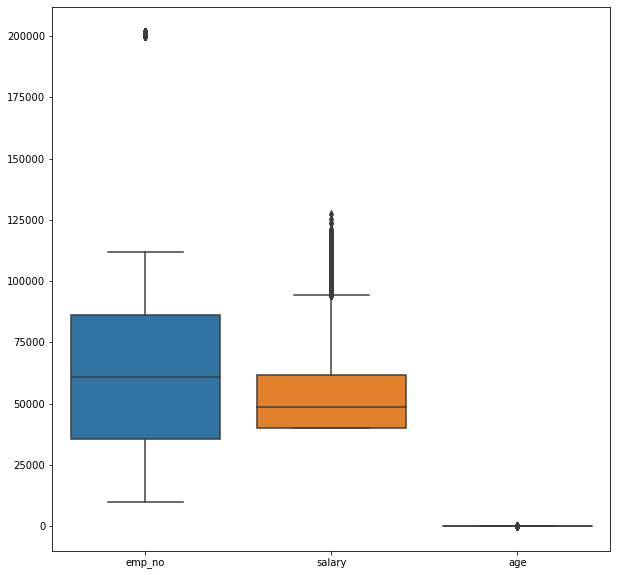

In [18]:
#box blot to check the outliers and graph the mean of the numeric numbers
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(ax=ax, data=dataset);

C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


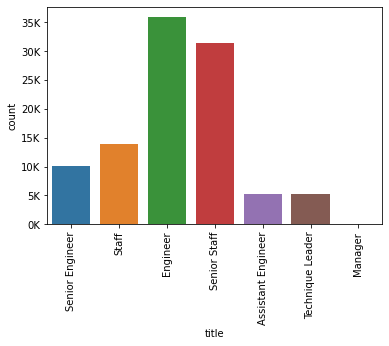

In [19]:
#counting the departmets 
ax =sns.countplot(dataset['title'] , data = dataset.sort_values('title', ascending=False))
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

<AxesSubplot:xlabel='gender', ylabel='age'>

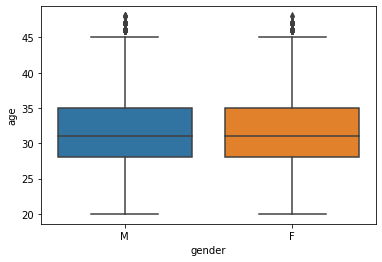

In [20]:
# boxblot for the age and gender
sns.boxplot(x='gender', y='age', data=dataset)

In [21]:
# converting age to numerical 0 for male and 1 for female 
dataset['gender'].replace(to_replace=['M','F'],value = [0,1],inplace = True)
dataset.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,title,dept_no,age
0,10001,1953-09-02,Georgi,Facello,0,1986-06-26,60117,Senior Engineer,d005,33.0
1,10002,1964-06-02,Bezalel,Simmel,1,1985-11-21,65828,Staff,d007,21.0
2,10003,1959-12-03,Parto,Bamford,0,1986-08-28,40006,Senior Engineer,d004,27.0
3,10004,1954-05-01,Chirstian,Koblick,0,1986-12-01,40054,Engineer,d004,33.0
4,10005,1955-01-21,Kyoichi,Maliniak,0,1989-09-12,78228,Senior Staff,d003,35.0


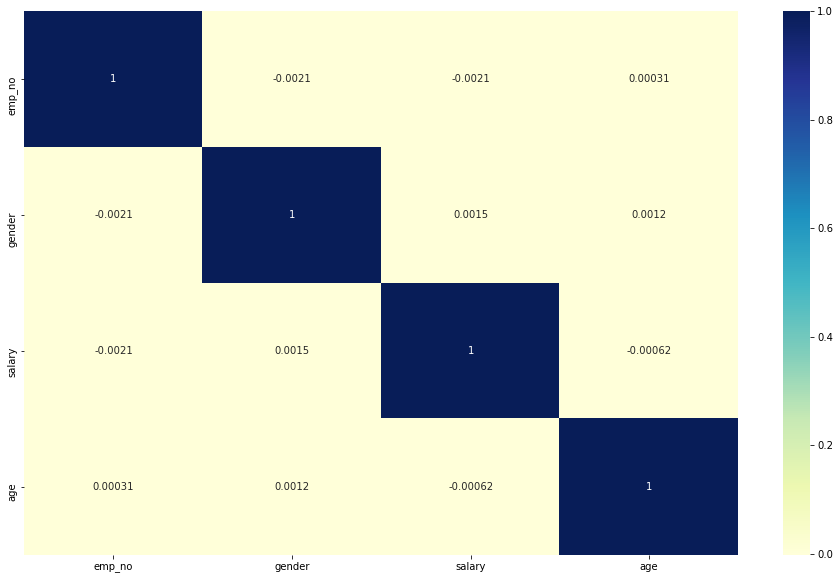

In [22]:
# features correlation 
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

### we need to make a cluster for the employees based on the age and salary

In [59]:
Z = dataset.iloc[:,[6,9]].values

### Using the elbow method to find the optimal number of clusters

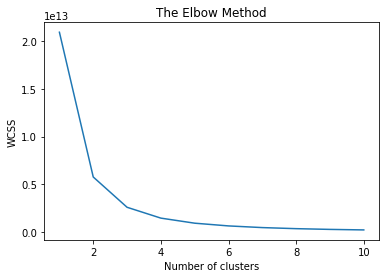

In [60]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K-Means model on the dataset

In [61]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42) # will go for 4 clusters 
y_kmeans = kmeans.fit_predict(Z)

### Visualising the clusters

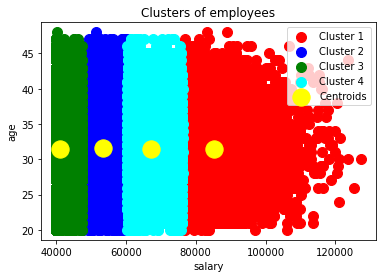

<Figure size 1152x1440 with 0 Axes>

In [67]:
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Z[y_kmeans == 3, 0], Z[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of employees')
plt.xlabel('salary')
plt.ylabel('age')
plt.legend()
plt.show()

### converting categorical variables 

In [27]:
Features =dataset [['gender','age']]
Features.head()

,gender,age
0,0,33.0
1,1,21.0
2,0,27.0
3,0,33.0
4,0,35.0


In [28]:
# dummy variable 
Features = pd.concat([Features,pd.get_dummies(dataset['title'])], axis=1)
Features.drop(['Manager'], axis = 1,inplace=True)
Features.head()

,gender,age,Assistant Engineer,Engineer,Senior Engineer,Senior Staff,Staff,Technique Leader
0,0,33.0,0,0,1,0,0,0
1,1,21.0,0,0,0,0,1,0
2,0,27.0,0,0,1,0,0,0
3,0,33.0,0,1,0,0,0,0
4,0,35.0,0,0,0,1,0,0


In [29]:
Features = pd.concat([Features,pd.get_dummies(dataset['dept_no'])], axis=1)
Features.head()

,gender,age,Assistant Engineer,Engineer,Senior Engineer,Senior Staff,Staff,Technique Leader,d001,d002,d003,d004,d005,d006,d007,d008,d009
0,0,33.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,21.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,27.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,33.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,35.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [30]:
#setting features and target 
X = Features
Y = dataset['salary'].values
Y[:5]

array([60117, 65828, 40006, 40054, 78228], dtype=int64)

### Train Test split

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1)

In [32]:
#scaling the features 
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.81839619,  0.28938885, -0.23180655, -0.73826305,  3.01791888,
        -0.66880655, -0.39805097, -0.23239415, -0.26630215, -0.24819846,
        -0.23262886, -0.57096759,  1.63971394, -0.22773119, -0.43392327,
        -0.22835097, -0.2297524 ],
       [ 1.22190207, -2.04372134, -0.23180655, -0.73826305, -0.33135417,
        -0.66880655,  2.51224109, -0.23239415, -0.26630215, -0.24819846,
        -0.23262886, -0.57096759, -0.60986247, -0.22773119,  2.30455491,
        -0.22835097, -0.2297524 ],
       [-0.81839619, -0.87716625, -0.23180655, -0.73826305,  3.01791888,
        -0.66880655, -0.39805097, -0.23239415, -0.26630215, -0.24819846,
        -0.23262886,  1.7514129 , -0.60986247, -0.22773119, -0.43392327,
        -0.22835097, -0.2297524 ],
       [-0.81839619,  0.28938885, -0.23180655,  1.35453075, -0.33135417,
        -0.66880655, -0.39805097, -0.23239415, -0.26630215, -0.24819846,
        -0.23262886,  1.7514129 , -0.60986247, -0.22773119, -0.43392327,
        -0.22835097

### Evaluation metrics

In [44]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [45]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 9043.77987442033
MSE: 129479863.72594881
RMSE: 11378.921905257494
R2 Square 0.37087072142615307
__________________________________
Train set evaluation:
_____________________________________
MAE: 9061.97182702104
MSE: 130491199.02365081
RMSE: 11423.274444030958
R2 Square 0.3644614268204607
__________________________________


#### Features importance for the lin reg

Feature: 0, Score: -50.91568
Feature: 1, Score: -1.23363
Feature: 2, Score: 771.46058
Feature: 3, Score: 746.08263
Feature: 4, Score: 742.71625
Feature: 5, Score: -1838.32777
Feature: 6, Score: -1839.51922
Feature: 7, Score: 953.22554
Feature: 8, Score: 9570.34202
Feature: 9, Score: 7874.50963
Feature: 10, Score: -7585.05788
Feature: 11, Score: -5288.24124
Feature: 12, Score: -5224.03668
Feature: 13, Score: -8003.30877
Feature: 14, Score: 18772.08037
Feature: 15, Score: -2539.90431
Feature: 16, Score: -7576.38314


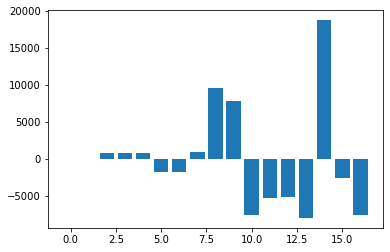

In [72]:
from matplotlib import pyplot
importance = lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(impoxrtance))], importance)
pyplot.show()

In [48]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, Y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 9075.868153713267
MSE: 129586998.65650111
RMSE: 11383.628536477336
R2 Square 0.37035016386894803
__________________________________
Train set evaluation:
_____________________________________
MAE: 9094.913048884657
MSE: 130621014.57039382
RMSE: 11428.955095300436
R2 Square 0.36382917891431177
__________________________________


Feature: 0, Score: -43.81570
Feature: 1, Score: 6.22523
Feature: 2, Score: 6571.03000
Feature: 3, Score: 6604.98109
Feature: 4, Score: 6577.47716
Feature: 5, Score: 6792.69990
Feature: 6, Score: 6815.73245
Feature: 7, Score: 6752.28113
Feature: 8, Score: 13167.09435
Feature: 9, Score: 11463.00831
Feature: 10, Score: -4004.57362
Feature: 11, Score: 1113.10085
Feature: 12, Score: 1180.10568
Feature: 13, Score: -1417.82211
Feature: 14, Score: 22399.65054
Feature: 15, Score: 1037.55531
Feature: 16, Score: -3994.77261


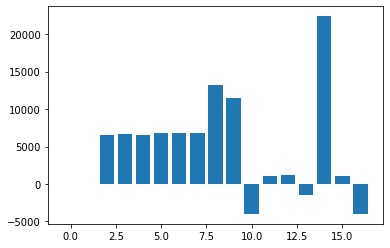

In [74]:
from matplotlib import pyplot
importance = sgd_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [68]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 9058.688298444775
MSE: 129500936.96452288
RMSE: 11379.847844524234
R2 Square 0.37076832873743837
__________________________________
Train set evaluation:
_____________________________________
MAE: 9076.868225964972
MSE: 130528443.9328696
RMSE: 11424.904548085713
R2 Square 0.3642800308593521
__________________________________


Feature: 0, Score: -48.84133
Feature: 1, Score: -1.44888
Feature: 2, Score: 320.30851
Feature: 3, Score: 300.68433
Feature: 4, Score: 296.09799
Feature: 5, Score: -758.85434
Feature: 6, Score: -754.58655
Feature: 7, Score: 498.48761
Feature: 8, Score: 8901.71749
Feature: 9, Score: 7215.94251
Feature: 10, Score: -7939.67037
Feature: 11, Score: -4301.00392
Feature: 12, Score: -4235.92773
Feature: 13, Score: -6845.60498
Feature: 14, Score: 18125.06199
Feature: 15, Score: -2995.90776
Feature: 16, Score: -7924.60724


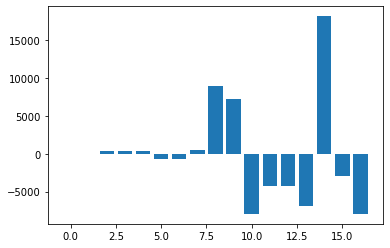

In [77]:
from matplotlib import pyplot
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [70]:
from sklearn.linear_model import Lasso

model2 = Lasso(alpha=0.1, 
              precompute=True, 
 
              positive=True, 
              selection='random',
              random_state=42)
model2.fit(X_train, Y_train)

test_pred = model2.predict(X_test)
train_pred = model2.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 9044.391452658498
MSE: 129488359.3374601
RMSE: 11379.295203898178
R2 Square 0.370829442127679
__________________________________
Train set evaluation:
_____________________________________
MAE: 9062.235156216833
MSE: 130495458.64942509
RMSE: 11423.460887551772
R2 Square 0.3644406809271965
__________________________________


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 4477.68294
Feature: 3, Score: 4456.93242
Feature: 4, Score: 4448.63210
Feature: 5, Score: 1867.08966
Feature: 6, Score: 1864.01946
Feature: 7, Score: 4658.13508
Feature: 8, Score: 18626.12040
Feature: 9, Score: 16930.21491
Feature: 10, Score: 1471.69632
Feature: 11, Score: 3767.14128
Feature: 12, Score: 3828.73401
Feature: 13, Score: 1053.09822
Feature: 14, Score: 27828.16605
Feature: 15, Score: 6516.51658
Feature: 16, Score: 1481.00504


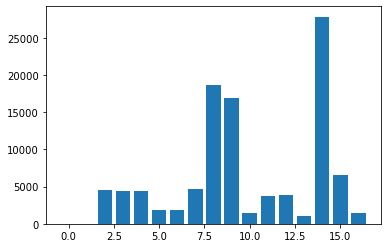

In [78]:
from matplotlib import pyplot
importance = model2.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### The R2 score for all models are not good enogh we defintely will need more items more related to the target like the numbers of the experience so the model could learn and give us better result but if we go for these score will go for lasso regressor most dummy features got correlated with the goal and consider less for MAE